In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

import joblib

In [2]:
np.random.seed(42)
n = 1000

data = pd.DataFrame({
    "transport_km": np.random.randint(0, 50, n),
    "electricity_kwh": np.random.randint(50, 500, n),
    "flights_per_year": np.random.randint(0, 10, n),
    "diet_type": np.random.choice([0,1], n),  # 0=veg, 1=non-veg
    "shopping_score": np.random.randint(1, 10, n)
})

# Simulated carbon formula
data["carbon_kg"] = (
    data["transport_km"] * 0.21 +
    data["electricity_kwh"] * 0.5 +
    data["flights_per_year"] * 90 +
    data["diet_type"] * 200 +
    data["shopping_score"] * 15 +
    np.random.normal(0, 50, n)
)

data.head()

,transport_km,electricity_kwh,flights_per_year,diet_type,shopping_score,carbon_kg
0,38,426,1,1,2,526.184079
1,28,338,7,1,9,1194.848869
2,14,486,8,1,8,1234.353271
3,42,199,0,1,3,408.988025
4,7,326,4,1,8,846.226333


In [3]:
X = data.drop("carbon_kg", axis=1)
y = data["carbon_kg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (800, 5)
Testing data shape: (200, 5)


In [5]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))


# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))

Linear Regression R2: 0.9717679395891002
Linear Regression MAE: 38.931033269990834

Random Forest R2: 0.9586590761594607
Random Forest MAE: 46.560620858243844


In [6]:
joblib.dump(rf, "carbon_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [7]:
def predict_carbon(transport, electricity, flights, diet, shopping):
    model = joblib.load("carbon_model.pkl")
    input_data = np.array([[transport, electricity, flights, diet, shopping]])
    prediction = model.predict(input_data)
    return prediction[0]


result = predict_carbon(20, 300, 2, 1, 5)
print("Predicted Carbon Emission (kg):", result)

Predicted Carbon Emission (kg): 627.2335285558854


C:\Users\Nikita\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [8]:
def eco_score(carbon):
    if carbon < 1000:
        return "Low Impact 🌱"
    elif carbon < 2000:
        return "Medium Impact ⚖"
    else:
        return "High Impact 🔥"

print("Eco Category:", eco_score(result))

Eco Category: Low Impact 🌱


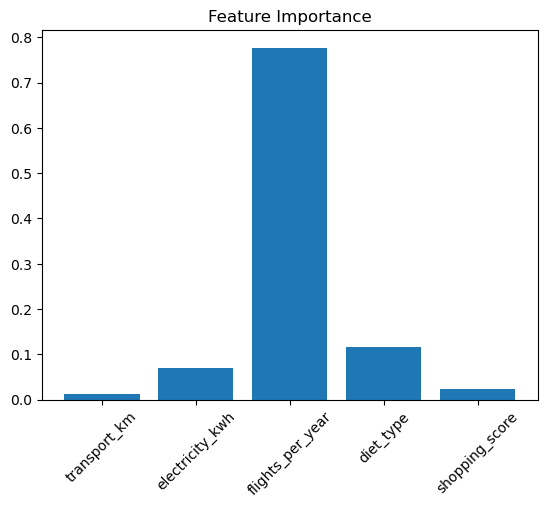

In [9]:
importance = rf.feature_importances_

plt.figure()
plt.bar(X.columns, importance)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()